In [4]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
import jax.numpy as jnp
import numpy as np

from kmeans_jax.theory_experiments import (
    plot_rho_paper_figure,
    plot_theorem_diff,
    plot_theorem_typical_partition,
    plot_theorem_warmup,
    plot_union_bound_corollary,
    run_experiments_theorem_warmup,
    run_main_theorem_experiments,
    run_theorem_typical_part_experiments,
    run_union_bound_cor_experiments,
)

# Warning:

Running these experiments can take several hours. Some experiments are run at high dimentionality, which can be memory expensive. If you run out of memory reduce the batch size.

# Experiments for Theorems in main paper


## Theorem 2.6

### Run Experiments

In [ ]:
def run_experiments_main_thm_paper(
    path_to_output,
    overwrite=False,
    batch_size=1000,
):
    size_cluster_C = 20
    size_cluster_T = 20

    prior_std = 1.0
    noise_std_vals = np.array([1, 5, 10, 20, 30, 50, 100])
    dimension_vals = np.logspace(0.8, 5, 20, dtype=int)
    n_experiments = 100000
    seed = 0

    return run_main_theorem_experiments(
        dimension_vals,
        noise_std_vals,
        prior_std,
        size_cluster_C,
        size_cluster_T,
        n_experiments,
        path_to_output,
        overwrite=overwrite,
        seed=seed,
        batch_size=batch_size,
    )


# The batch size defines how many experiments are run in parallel.
# If the basedir for path_to_output does not exist, it will be created.

# run_experiments_main_thm_paper(
#     path_to_output="../results/numerical_experiments_theory/results_maindiff_theorem.npz",
#     overwrite=False,
#     batch_size=1000, # 1000 experiments in parallel
# )

### Plots

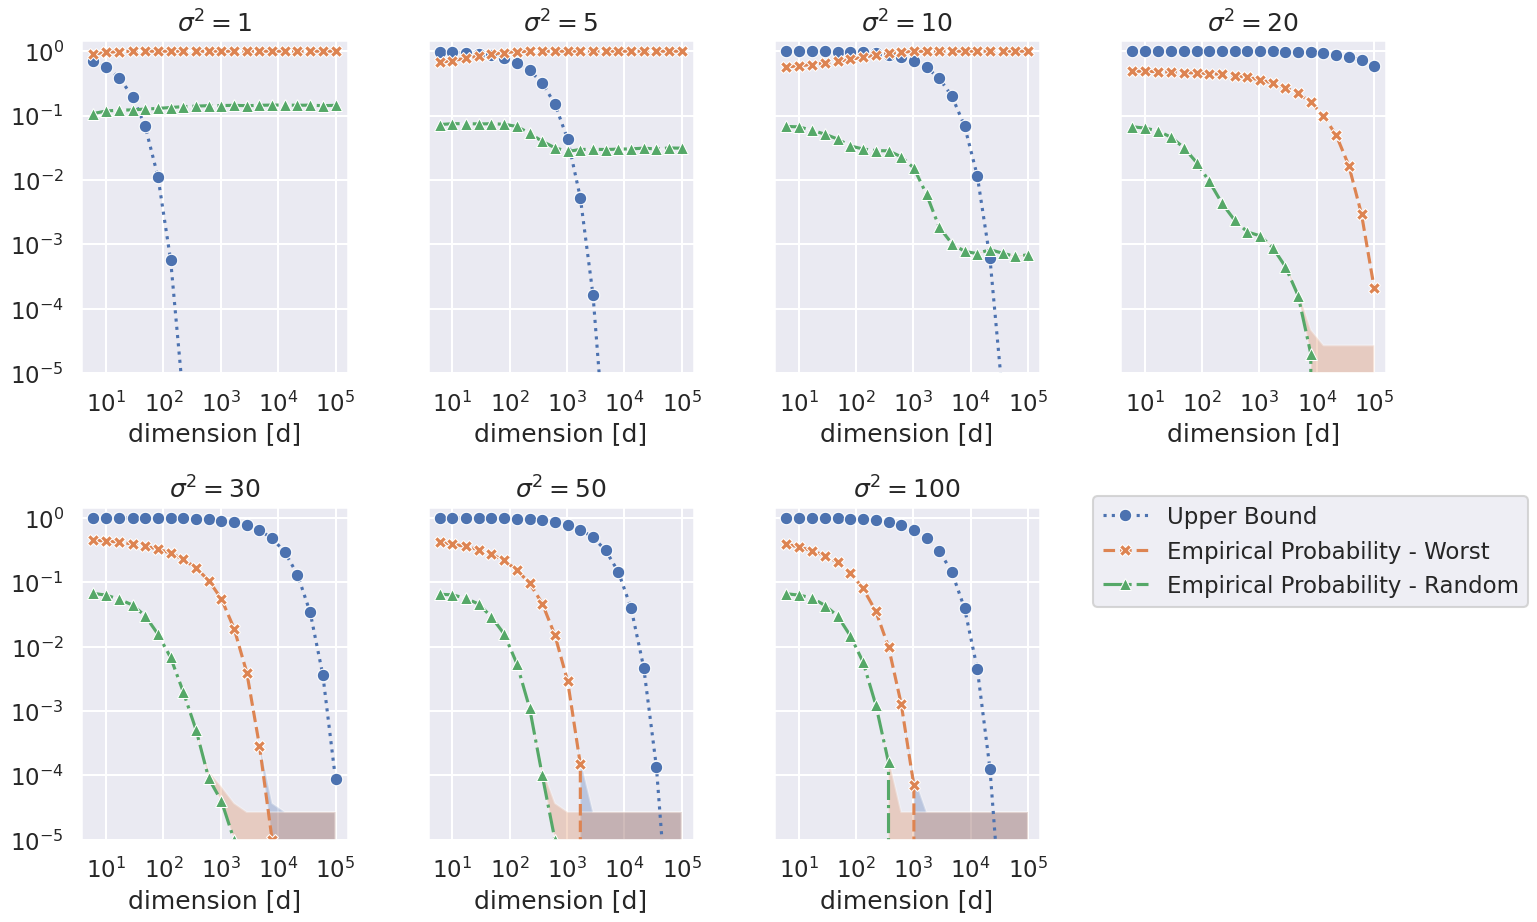

In [7]:
results_maindiff = jnp.load(
    "../results/numerical_experiments_theory/results_maindiff_theorem.npz",
    allow_pickle=True,
)
plot_theorem_diff(results_maindiff)

## Theorem 2.8: A typical partition

### Run Experiments

In [ ]:
def run_experiments_typical_part_thm_paper(
    path_to_output,
    overwrite=False,
    batch_size=100,
):
    seed = 0
    n_data_points = 40
    q_value = 2.8460497  # see Theorem 2.8 in the paper
    n_experiments = 10000
    dimension_vals = np.logspace(0.8, 5, 20, dtype=int)[::-1]
    beta_vals = np.array([0.1, 0.5, 0.99, 1.1, 1.5, 3.0, 10.0])

    results = run_theorem_typical_part_experiments(
        dimension_vals,
        beta_vals,
        q_value,
        n_data_points,
        n_experiments,
        path_to_output,
        overwrite=overwrite,
        seed=seed,
        batch_size=batch_size,
    )
    return results


# run_experiments_typical_part_thm_paper(
#     path_to_output="../results/numerical_experiments_theory/results_main_typical_part_theorem.npz",
#     overwrite=True,
#     batch_size=1000,
# )

### Plots

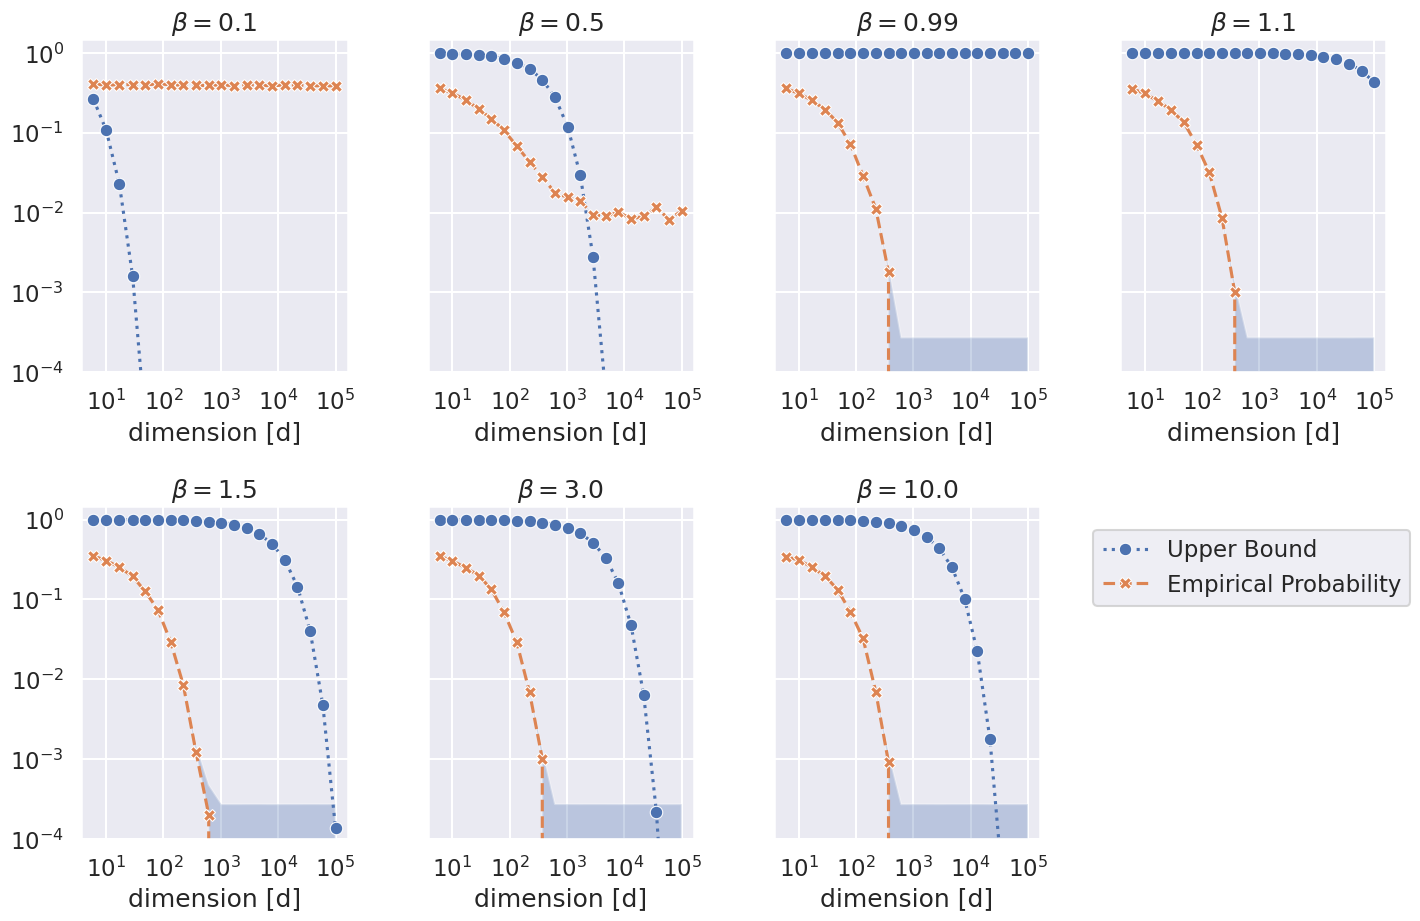

In [9]:
results_main_typical_part = jnp.load(
    "../results/numerical_experiments_theory/results_main_typical_part_theorem.npz",
    allow_pickle=True,
)
plot_theorem_typical_partition(results_main_typical_part)

# Experiments for Theorems/Corollaries in Appendix

## 'Warm-up' Teorem

### Run Experiments

In [ ]:
def run_experiments_wmup_thm_paper(path_to_output, overwrite=False, batch_size=1000):
    prior_std = 1.0
    noise_std_vals = np.sqrt(np.array([1, 5, 10, 20, 30, 50, 100]))
    dimension_vals = np.logspace(0.8, 5, 20, dtype=int)
    n_experiments = 100000
    seed = 0

    results_warmup = run_experiments_theorem_warmup(
        dimension_vals=dimension_vals,
        noise_std_vals=noise_std_vals,
        prior_std=prior_std,
        n_experiments=n_experiments,
        seed=seed,
        path_to_output=path_to_output,
        overwrite=overwrite,
        batch_size=batch_size,
    )

    return results_warmup


# run_experiments_wmup_thm_paper(
#     path_to_output="../results/numerical_experiments_theory/results_warmup_theorem.npz",
#     overwrite=False,
#     batch_size=True,
# )

### Plots

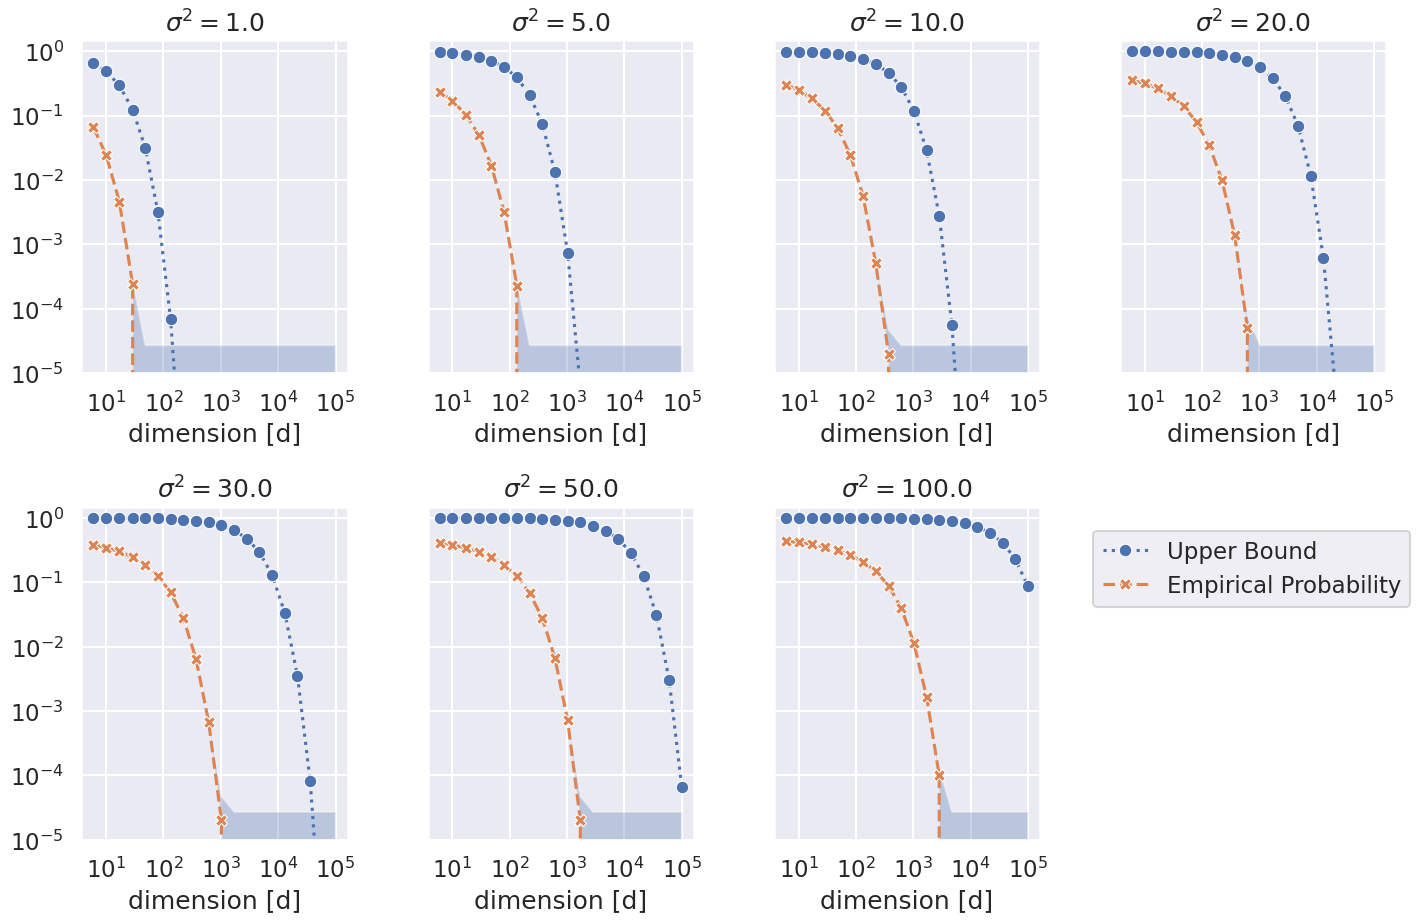

In [11]:
results_wmup = jnp.load(
    "../results/numerical_experiments_theory/results_warmup_theorem.npz",
    allow_pickle=True,
)

plot_theorem_warmup(
    results_wmup,
)

## Union Bound Corollary for Theorem 2.6

In [ ]:
def run_experiments_unin_bound_cor_paper(
    path_to_output,
    overwrite=False,
    batch_size=1000,
):
    cluster_size = 20
    prior_std = 1.0
    noise_std_vals = np.sqrt(np.array([1, 5, 10, 20, 30, 50, 100]))
    dimension_vals = np.logspace(0.8, 5, 20, dtype=int)
    n_experiments = 100000
    seed = 0

    return run_union_bound_cor_experiments(
        dimension_vals,
        noise_std_vals,
        prior_std,
        cluster_size,
        n_experiments,
        path_to_output,
        overwrite=overwrite,
        seed=seed,
        batch_size=batch_size,
    )


# run_experiments_unin_bound_cor_paper(
#     path_to_output="../results/numerical_experiments_theory/results_union_bound_corollary.npz",
#     overwrite=False,
#     batch_size=1000,
# )

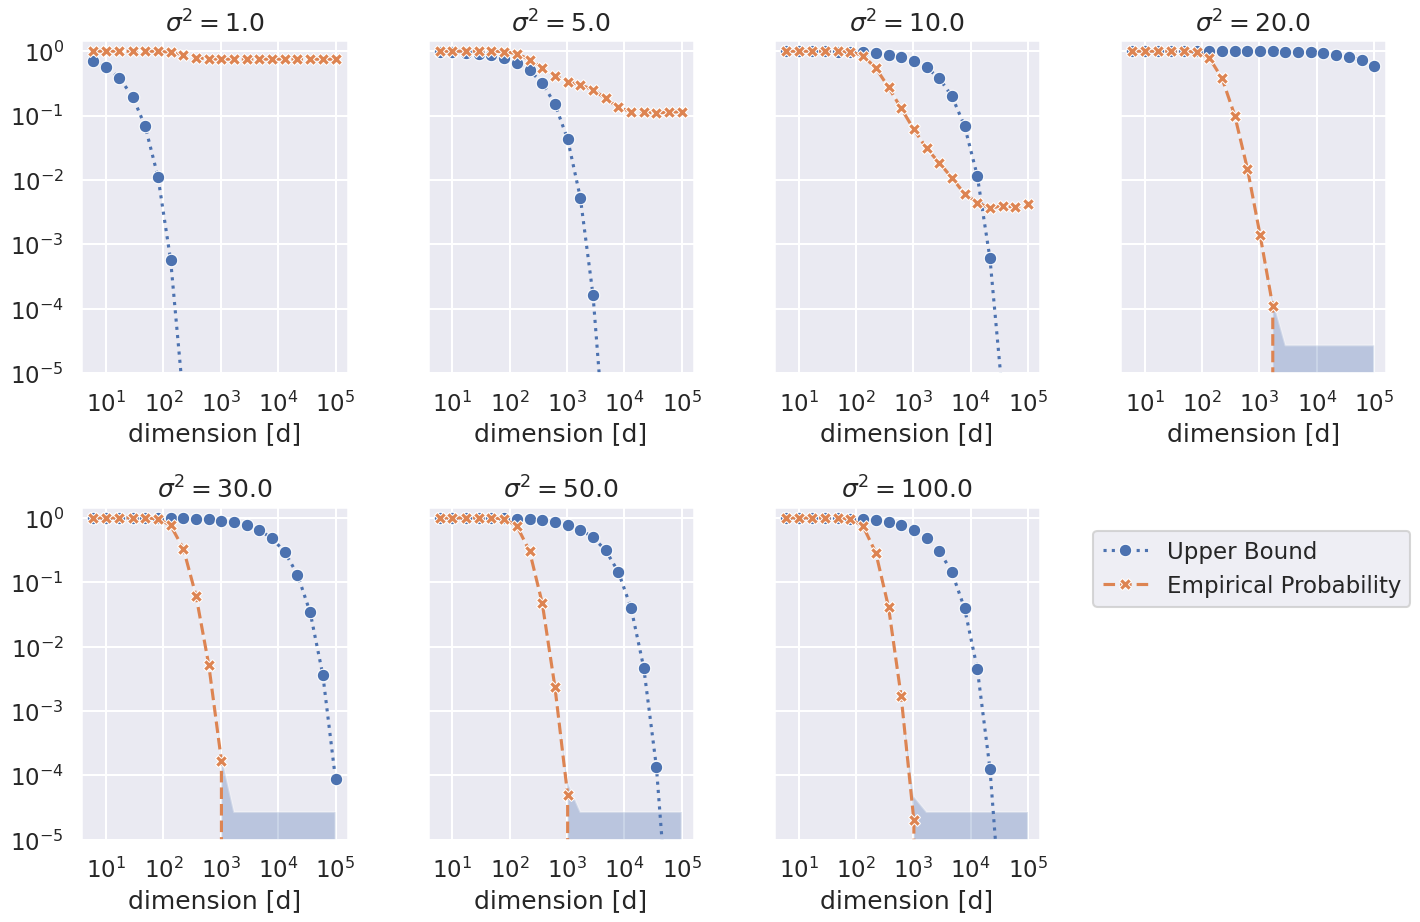

In [13]:
results_union_bound = jnp.load(
    "../results/numerical_experiments_theory/results_union_bound_corollary.npz",
    allow_pickle=True,
)
plot_union_bound_corollary(
    results_union_bound,
)

# Plots for values of $\rho$ for Theorem 2.6

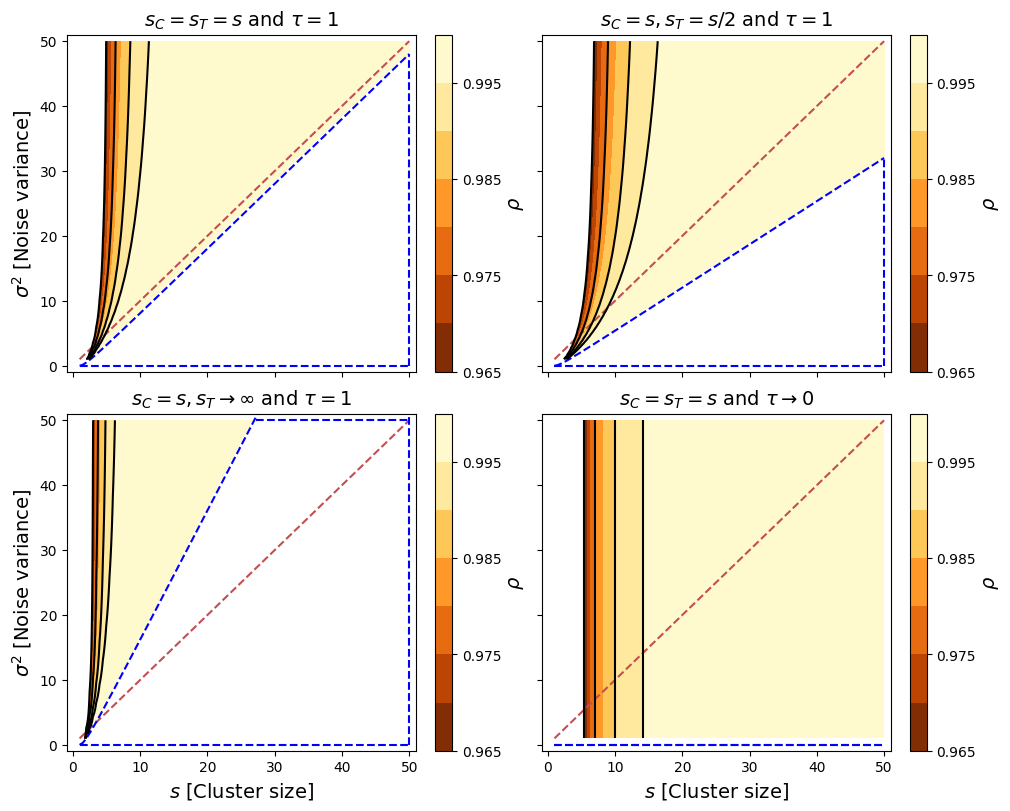

In [14]:
plot_rho_paper_figure()